# 1. Introdução ao Modelo de Perceptron

O Perceptron é considerado um dos primeiros modelos formais de redes neurais artificiais e foi proposto por Frank Rosenblatt em 1958, com o objetivo de simular o comportamento de um neurônio biológico de forma simplificada. Esse modelo é capaz de realizar tarefas de classificação linear, ou seja, separar dados em duas classes distintas por meio de uma linha (em duas dimensões) ou um hiperplano (em dimensões maiores). Com base em um conjunto de entradas numéricas ponderadas por pesos ajustáveis, o Perceptron realiza um somatório, aplica uma função de ativação e produz uma saída binária — tipicamente 0 ou 1 — representando a classe à qual o dado pertence *(ROSENBLATT, 1958)*.

Apesar de sua simplicidade, o Perceptron possui importância histórica fundamental no campo da inteligência artificial. Ele inaugurou o estudo sobre aprendizado supervisionado e serviu como base para modelos mais avançados, como as redes multicamadas (MLPs), que superaram suas limitações. Entre essas limitações está a incapacidade de resolver problemas que não são linearmente separáveis, como o clássico exemplo do operador lógico XOR. Ainda assim, seu funcionamento é essencial para compreender a base do aprendizado em redes neurais e para desenvolver a intuição sobre pesos, bias, funções de ativação e regras de aprendizado *(HAYKIN, 2009)*.


# 2. Estrutura Matemática do Perceptron

O Perceptron é composto por um conjunto de entradas $ x_1, x_2, \dots, x_n $, cada uma associada a um peso sináptico $ w_1, w_2, \dots, w_n $, e por um termo adicional chamado bias (ou viés), denotado por $ b $. O primeiro passo do modelo é realizar o somatório ponderado dessas entradas com seus respectivos pesos e adicionar o bias. Esse resultado é então passado por uma função de ativação, que define a saída do neurônio. A equação do somatório pode ser expressa como:

$$
u = x_1 \cdot w_1 + x_2 \cdot w_2 + \cdots + x_n \cdot w_n + b
$$

Em termos matriciais, essa equação equivale a:

$$
u = \sum_{i=1}^{n} x_i \cdot w_i + b
$$

A saída do Perceptron, $ y $, é obtida aplicando a função de ativação ao valor $ u $. No modelo clássico, utiliza-se a função **degrau unitário** (ou função Heaviside), definida como:

$$
y = 
\begin{cases}
1, & \text{se } u \geq 0 \\
0, & \text{caso contrário}
\end{cases}
$$

Esse tipo de função torna o Perceptron um classificador binário, sendo ideal para problemas de separação linear. A simplicidade dessa estrutura permite o aprendizado de padrões básicos, porém impõe limitações quando se trata de dados que não podem ser separados por uma linha reta *(HAYKIN, 2009)*.

### Diagrama do Funcionamento do Perceptron

A figura a seguir busca reforçar o entendimento do funcionamento de um Perceptron. Como mencionado antes, entradas $ x_1, x_2, \dots, x_n $ são multiplicadas por pesos sinápticos $ w_1, w_2, \dots, w_n $, e o resultado é somado ao bias $ b $. O valor total do somatório $ u $ é então passado por uma função de ativação $ \varphi $, resultando na saída $ y $, que representa a classificação binária (0 ou 1). Esse fluxo de processamento imita, de forma simplificada, o funcionamento de um neurônio biológico.

<figure style="text-align: center;" >
      <center>
          <img  src="./diagrama_perceptron.png" width="40%"/>
          <figcaption> Figura 1. Ilustração Perceptron.  Fonte:  Elaborada pelos autores.
         </figcaption>
      </center>
</figure>


### Implementação manual simples

In [1]:
# Função que implementa a operação de um Perceptron simples (sem aprendizado ainda)
def perceptron_unitario(entradas, pesos, bias):
    soma = 0
    for i in range(len(entradas)):
        soma += entradas[i] * pesos[i]
    soma += bias

    # Função degrau (Heaviside)
    if soma >= 0:
        return 1
    else:
        return 0

# Exemplo de uso
x = [1, 0]             # Entradas
w = [0.5, -0.5]        # Pesos
b = 0.1                # Bias

saida = perceptron_unitario(x, w, b)
print("Saída do Perceptron:", saida)


Saída do Perceptron: 1


### 2.1 Função de Custo (Erro)

Durante o treinamento do Perceptron, é necessário avaliar se a saída produzida está correta em relação ao valor esperado (ou desejado). Para isso, é utilizada uma função de custo simples baseada no erro absoluto. Essa função mede a diferença entre a saída esperada ($ y_d $) e a saída predita ($ y $):

$$
E = y_d - y
$$

Se o erro for diferente de zero, isso indica que o Perceptron cometeu um erro de classificação e, portanto, seus parâmetros (pesos e bias) precisam ser ajustados. Embora simples, essa função é suficiente para orientar a atualização dos pesos durante o aprendizado, garantindo que o modelo caminhe gradativamente para uma solução correta *(HAYKIN, 2009)*.


### 2.2 Regra de Atualização dos Pesos e Bias

A atualização dos pesos no Perceptron é feita com base no erro obtido na saída. A ideia é ajustar os pesos na direção que reduza esse erro. A fórmula geral para a atualização de cada peso $ w_i $ e do bias $ b $ é dada por:

$$
w_i \leftarrow w_i + \eta \cdot E \cdot x_i
$$
$$
b \leftarrow b + \eta \cdot E
$$

Onde:

- $ \eta $ é a **taxa de aprendizado**, um hiperparâmetro que controla o tamanho do passo dado na direção do erro.
- $ E = y_d - y $ é o erro cometido.
- $ x_i $ é o valor da entrada associada ao peso $ w_i $.

Essas regras garantem que o modelo aprenda com seus próprios erros ao longo das iterações (ou épocas), ajustando seus parâmetros internos com o objetivo de produzir a saída correta no futuro *(ROSENBLATT, 1958)*.


### 2.3 Fluxo Completo do Algoritmo do Perceptron

Abaixo está o passo a passo do funcionamento de um Perceptron durante o processo de treinamento:

1. **Inicialização** dos pesos e do bias (com valores aleatórios pequenos ou zeros).
2. **Para cada amostra de treinamento**:
   - Calcular a **soma ponderada** das entradas com os pesos, somando o bias.
   - Aplicar a **função de ativação** para obter a saída predita.
   - Calcular o **erro** comparando a saída desejada com a saída predita.
   - **Atualizar os pesos e o bias** com base no erro.
3. **Repetir o processo** por um número definido de épocas (iterações) ou até que o erro seja nulo para todos os exemplos.

Esse ciclo de treinamento ajusta progressivamente os pesos do Perceptron, fazendo com que ele aprenda a classificar corretamente os padrões de entrada. Quando o erro total atinge zero, dizemos que o Perceptron convergiu para uma solução.


In [2]:
# Implementação completa do Perceptron para problemas simples (sem bibliotecas externas)
def treinar_perceptron(entradas, saidas_desejadas, taxa_aprendizado=0.1, epocas=10):
    n_entradas = len(entradas[0])
    pesos = [0.0 for _ in range(n_entradas)]
    bias = 0.0
    historico_erros = []

    for epoca in range(epocas):
        total_erros = 0

        for i in range(len(entradas)):
            soma = 0
            for j in range(n_entradas):
                soma += entradas[i][j] * pesos[j]
            soma += bias

            # Função de ativação degrau
            saida = 1 if soma >= 0 else 0

            erro = saidas_desejadas[i] - saida
            total_erros += abs(erro)

            # Atualização dos pesos e bias
            for j in range(n_entradas):
                pesos[j] += taxa_aprendizado * erro * entradas[i][j]
            bias += taxa_aprendizado * erro

        historico_erros.append(total_erros)
        print(f"Época {epoca+1}, Erros: {total_erros}")

        if total_erros == 0:
            break

    return pesos, bias, historico_erros


# 3. Aplicação do Perceptron aos Problemas Lógicos AND e OR

O Perceptron pode ser utilizado para resolver problemas de classificação binária simples, como os operadores lógicos **AND** e **OR**. Ambos são **linearmente separáveis**, ou seja, é possível traçar uma linha reta que separe os dados das duas classes. Isso os torna ideais para testar a capacidade de aprendizado do Perceptron.

Cada um desses operadores recebe duas entradas binárias e produz uma saída binária. No caso do **AND**, a saída é 1 apenas quando ambas as entradas são 1. Já no **OR**, a saída é 1 se ao menos uma das entradas for 1. Como veremos, o Perceptron é capaz de aprender esses padrões com eficiência *(HAYKIN, 2009)*.


### Trabalhando com dataset AND

In [3]:
# Conjunto de dados do operador lógico AND
entradas_and = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

saidas_and = [0, 0, 0, 1]


In [4]:
# Treinando o Perceptron no problema AND
pesos_and, bias_and, erros_and = treinar_perceptron(entradas_and, saidas_and, taxa_aprendizado=0.1, epocas=20)
print("Pesos finais (AND):", pesos_and)
print("Bias final (AND):", bias_and)


Época 1, Erros: 2
Época 2, Erros: 3
Época 3, Erros: 3
Época 4, Erros: 0
Pesos finais (AND): [0.2, 0.1]
Bias final (AND): -0.20000000000000004


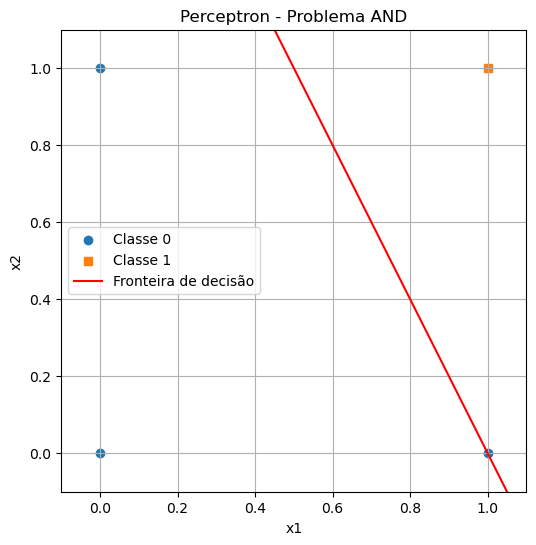

In [5]:
import matplotlib.pyplot as plt

# Separando os pontos por classe
classe_0 = [entradas_and[i] for i in range(len(saidas_and)) if saidas_and[i] == 0]
classe_1 = [entradas_and[i] for i in range(len(saidas_and)) if saidas_and[i] == 1]

# Separando coordenadas
x0_0, x1_0 = zip(*classe_0)
x0_1, x1_1 = zip(*classe_1)

# Gráfico
plt.figure(figsize=(6, 6))
plt.scatter(x0_0, x1_0, label="Classe 0", marker="o")
plt.scatter(x0_1, x1_1, label="Classe 1", marker="s")

# Gerando a linha da fronteira de decisão: u = w1*x1 + w2*x2 + b = 0
# Resolvendo para x2: x2 = -(w1*x1 + b)/w2
import numpy as np
x_vals = np.linspace(-0.1, 1.1, 100)
w1, w2 = pesos_and
y_vals = -(w1 * x_vals + bias_and) / w2
plt.plot(x_vals, y_vals, label="Fronteira de decisão", color="red")

plt.title("Perceptron - Problema AND")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()


### Trabalhando com OR

In [6]:
# Conjunto de dados do operador lógico OR
entradas_or = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

saidas_or = [0, 1, 1, 1]

# Treinando o Perceptron no problema OR
pesos_or, bias_or, erros_or = treinar_perceptron(entradas_or, saidas_or, taxa_aprendizado=0.1, epocas=20)
print("Pesos finais (OR):", pesos_or)
print("Bias final (OR):", bias_or)


Época 1, Erros: 2
Época 2, Erros: 2
Época 3, Erros: 1
Época 4, Erros: 0
Pesos finais (OR): [0.1, 0.1]
Bias final (OR): -0.1


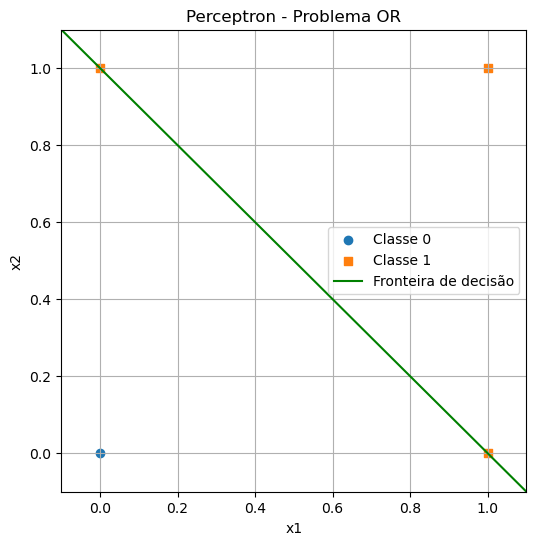

In [7]:
# Separando os pontos por classe
classe_0 = [entradas_or[i] for i in range(len(saidas_or)) if saidas_or[i] == 0]
classe_1 = [entradas_or[i] for i in range(len(saidas_or)) if saidas_or[i] == 1]

x0_0, x1_0 = zip(*classe_0)
x0_1, x1_1 = zip(*classe_1)

plt.figure(figsize=(6, 6))
plt.scatter(x0_0, x1_0, label="Classe 0", marker="o")
plt.scatter(x0_1, x1_1, label="Classe 1", marker="s")

# Fronteira de decisão
x_vals = np.linspace(-0.1, 1.1, 100)
w1, w2 = pesos_or
y_vals = -(w1 * x_vals + bias_or) / w2
plt.plot(x_vals, y_vals, label="Fronteira de decisão", color="green")

plt.title("Perceptron - Problema OR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()


### 3.5 Discussão dos Resultados

O Perceptron foi capaz de aprender corretamente tanto o operador lógico AND quanto o operador OR. Isso é evidenciado pela convergência do erro para zero durante o treinamento, bem como pela correta separação das classes nos gráficos. As fronteiras de decisão traçadas indicam que é possível separar perfeitamente as amostras por uma reta, o que confirma que ambos os problemas são linearmente separáveis.

Esse experimento serve para demonstrar uma das principais capacidades do Perceptron: aprender padrões simples que podem ser resolvidos por classificadores lineares. Na próxima seção, veremos um caso onde o modelo falha — o problema XOR — e discutiremos as consequências dessa limitação para a evolução das redes neurais artificiais *(ROSENBLATT, 1958; HAYKIN, 2009)*.


# 4. O Problema Lógico XOR

O operador lógico **XOR** (ou "ou exclusivo") retorna 1 apenas quando as entradas são diferentes. Sua tabela verdade é apresentada abaixo:

| Entrada 1 | Entrada 2 | Saída XOR |
|-----------|-----------|-----------|
|     0     |     0     |     0     |
|     0     |     1     |     1     |
|     1     |     0     |     1     |
|     1     |     1     |     0     |

Graficamente, é possível observar que os pontos que pertencem à mesma classe não podem ser separados por uma linha reta. Essa impossibilidade de separação linear torna o problema XOR **não linearmente separável**, o que impede que o Perceptron de camada única consiga aprender corretamente esse padrão.

Essa limitação foi criticada no famoso livro de Minsky e Papert (*Perceptrons*, 1969), que apontou a incapacidade do Perceptron em resolver esse tipo de problema. Por consequência, o interesse em redes neurais diminuiu por décadas. A superação dessa barreira só foi possível com o desenvolvimento das redes multicamadas (MLPs), que introduzem camadas intermediárias e funções de ativação diferenciáveis *(MINSKY; PAPERT, 1969)*.


### Dataset XOR

In [8]:
# Conjunto de dados do operador lógico XOR
entradas_xor = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

saidas_xor = [0, 1, 1, 0]


In [9]:
# Treinamento do Perceptron no problema XOR
pesos_xor, bias_xor, erros_xor = treinar_perceptron(entradas_xor, saidas_xor, taxa_aprendizado=0.1, epocas=30)
print("Pesos finais (XOR):", pesos_xor)
print("Bias final (XOR):", bias_xor)


Época 1, Erros: 3
Época 2, Erros: 3
Época 3, Erros: 4
Época 4, Erros: 4
Época 5, Erros: 4
Época 6, Erros: 4
Época 7, Erros: 4
Época 8, Erros: 4
Época 9, Erros: 4
Época 10, Erros: 4
Época 11, Erros: 4
Época 12, Erros: 4
Época 13, Erros: 4
Época 14, Erros: 4
Época 15, Erros: 4
Época 16, Erros: 4
Época 17, Erros: 4
Época 18, Erros: 4
Época 19, Erros: 4
Época 20, Erros: 4
Época 21, Erros: 4
Época 22, Erros: 4
Época 23, Erros: 4
Época 24, Erros: 4
Época 25, Erros: 4
Época 26, Erros: 4
Época 27, Erros: 4
Época 28, Erros: 4
Época 29, Erros: 4
Época 30, Erros: 4
Pesos finais (XOR): [-0.1, 0.0]
Bias final (XOR): 0.0


C:\Users\diogo\AppData\Local\Temp\ipykernel_12720\3621079598.py:15: RuntimeWarning: divide by zero encountered in divide
  y_vals = -(w1 * x_vals + bias_xor) / w2


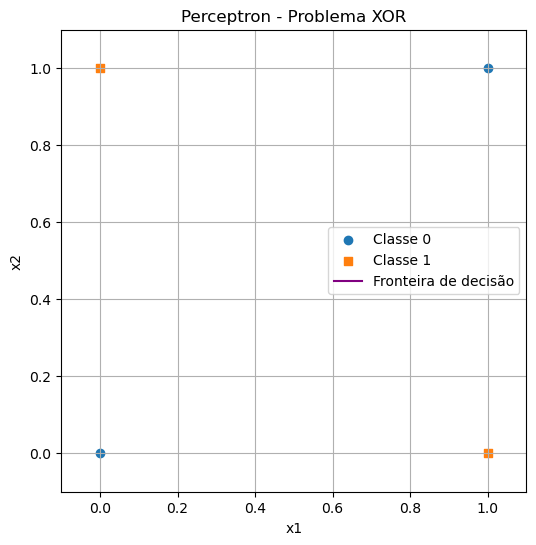

In [10]:
# Separando os pontos por classe
classe_0 = [entradas_xor[i] for i in range(len(saidas_xor)) if saidas_xor[i] == 0]
classe_1 = [entradas_xor[i] for i in range(len(saidas_xor)) if saidas_xor[i] == 1]

x0_0, x1_0 = zip(*classe_0)
x0_1, x1_1 = zip(*classe_1)

plt.figure(figsize=(6, 6))
plt.scatter(x0_0, x1_0, label="Classe 0", marker="o")
plt.scatter(x0_1, x1_1, label="Classe 1", marker="s")

# Tentando traçar a fronteira de decisão aprendida
x_vals = np.linspace(-0.1, 1.1, 100)
w1, w2 = pesos_xor
y_vals = -(w1 * x_vals + bias_xor) / w2
plt.plot(x_vals, y_vals, label="Fronteira de decisão", color="purple")

plt.title("Perceptron - Problema XOR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()


### 4.4 Discussão dos Resultados

Como previsto teoricamente, o Perceptron de camada única não foi capaz de aprender o operador lógico XOR. O gráfico mostra que a tentativa de separar os dados com uma reta falha em dividir corretamente os exemplos da classe 1 (pontos em azul) dos da classe 0 (pontos em laranja). Essa limitação evidencia que o modelo é inadequado para problemas **não linearmente separáveis**.

Esse foi um dos principais motivos de críticas à época de seu surgimento, levando a um período de estagnação no campo das redes neurais. O problema do XOR serviu de motivação para o desenvolvimento das **redes multicamadas (MLPs)**, que utilizam múltas camadas e funções de ativação contínuas, permitindo resolver esse tipo de problema com sucesso *(MINSKY; PAPERT, 1969; HAYKIN, 2009)*.


# 5. Visualizações e Convergência

Para compreender melhor o comportamento do Perceptron durante o treinamento, é importante visualizar o erro total ao longo das épocas. Essa análise permite identificar se o modelo está convergindo (aprendendo corretamente) ou se está estagnado. Quando o erro total atinge zero, significa que o Perceptron classificou corretamente todos os exemplos do conjunto de dados.

Abaixo, apresentamos os gráficos de erro por época para os três problemas lógicos estudados: AND, OR e XOR. Como esperado, os dois primeiros convergem rapidamente, enquanto o terceiro apresenta um erro constante e não convergente, devido à sua natureza não linear *(HAYKIN, 2009)*.


### Gráfico de erro por época

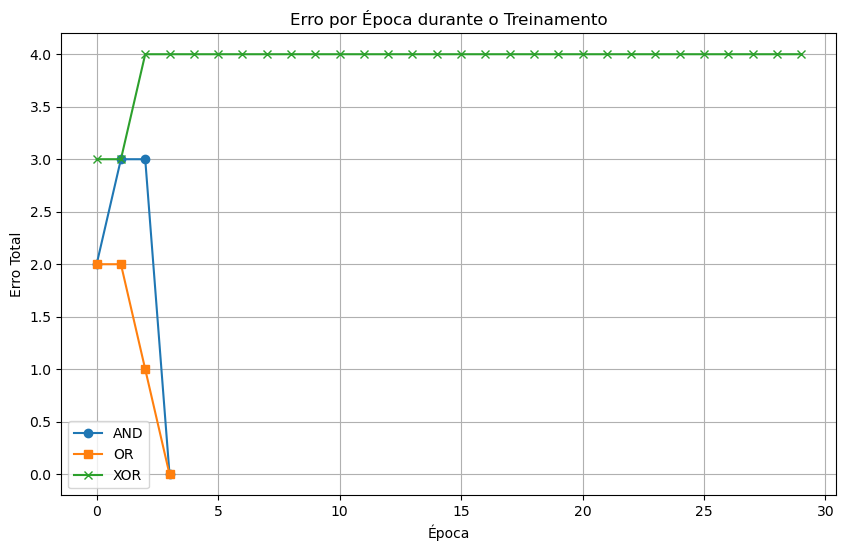

In [11]:
# Plotando os erros por época para AND, OR e XOR
plt.figure(figsize=(10, 6))

plt.plot(erros_and, label="AND", marker='o')
plt.plot(erros_or, label="OR", marker='s')
plt.plot(erros_xor, label="XOR", marker='x')

plt.title("Erro por Época durante o Treinamento")
plt.xlabel("Época")
plt.ylabel("Erro Total")
plt.grid(True)
plt.legend()
plt.show()


### 5.1 Análise da Convergência

A curva de erro para os problemas **AND** e **OR** apresenta uma queda acentuada, atingindo o erro zero em poucas épocas. Isso confirma que o Perceptron foi capaz de aprender esses padrões de forma eficiente. A simplicidade e linearidade desses problemas favorecem a aprendizagem com uma única camada e função de ativação do tipo degrau.

Em contraste, o problema **XOR** não apresenta convergência: o erro permanece constante ao longo das épocas, demonstrando a falha do Perceptron em aprender. Isso reforça a limitação do modelo quando confrontado com padrões que não podem ser separados linearmente.

### 5.2 Influência da Taxa de Aprendizado

A **taxa de aprendizado (\( \eta \))** influencia diretamente na velocidade de convergência do algoritmo. Taxas muito pequenas tornam o aprendizado lento; por outro lado, taxas muito altas podem fazer o modelo oscilar e não convergir. Neste experimento, utilizamos \( \eta = 0.1 \), valor geralmente adequado para problemas simples.

### 5.3 Número de Épocas

O número de **épocas** determina por quantas vezes o Perceptron percorre todo o conjunto de dados para ajustar seus pesos. Nos casos AND e OR, poucas épocas foram suficientes para a convergência. Já no caso do XOR, aumentar o número de épocas não resolve o problema, pois não há solução linear possível com esse modelo.


# 6. Discussão Final e Conclusões

O estudo do Perceptron representa um marco importante no entendimento dos fundamentos das redes neurais artificiais. Apesar de sua simplicidade, ele é capaz de aprender padrões linearmente separáveis como os operadores lógicos AND e OR, o que o torna uma ferramenta valiosa para introdução ao aprendizado supervisionado. Ao explorar sua estrutura matemática, regras de atualização e comportamento durante o treinamento, é possível compreender conceitos fundamentais como pesos, bias, função de ativação e função de custo.

Por outro lado, o experimento com o problema lógico XOR revelou a principal limitação do modelo: a incapacidade de aprender padrões não linearmente separáveis. Essa limitação teve impacto histórico significativo, levando inicialmente à crítica das redes neurais nos anos 60 e posteriormente ao desenvolvimento das redes multicamadas (MLPs). Essas redes, com múltiplas camadas ocultas e funções de ativação diferenciáveis, superam a limitação do Perceptron simples e ampliam enormemente o poder de representação dos modelos neurais. Portanto, compreender o Perceptron é essencial para construir uma base sólida em inteligência artificial e redes neurais modernas *(MINSKY; PAPERT, 1969; HAYKIN, 2009)*.


# Referências Bibliográficas

HAYKIN, Simon. *Neural Networks and Learning Machines*. 3rd ed. New York: Pearson, 2009.

MINSKY, Marvin; PAPERT, Seymour. *Perceptrons: An Introduction to Computational Geometry*. Expanded ed. Cambridge: MIT Press, 1969.

ROSENBLATT, Frank. The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain. *Psychological Review*, v. 65, n. 6, p. 386–408, 1958. Disponível em: https://psycnet.apa.org/doi/10.1037/h0042519. Acesso em: 17 abr. 2025.
